In [22]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [3]:
# Load data
path = '/content/spam.csv'
df = pd.read_csv(path, encoding='ISO-8859-1', usecols=[0, 1])
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

In [4]:
# Remove duplicate values
df = df.drop_duplicates(keep='first')

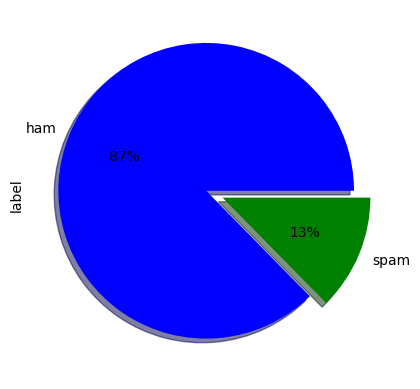

In [5]:
# Visualize label distribution
plot_df = df['label'].value_counts()
colors = ['blue', 'green']
explode = (0.06, 0.06)
plot_df.plot(kind="pie", shadow=True, explode=explode, colors=colors, autopct='%1.0f%%')
plt.show()

In [25]:
# Convert categorical values into numerical in the label column
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

In [7]:
# Resample for imbalanced dataset
df_majority = df[df['label'] == 0]
df_minority = df[df['label'] == 1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=0)
df_resampled = pd.concat([df_majority, df_minority_upsampled])

In [9]:
# Train-Test Split
X = df_resampled['text']
y = df_resampled['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# TF-IDF Vectorization
vect = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

In [11]:
# Convert label columns to integer
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [12]:
# Train Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vect, y_train)

MultinomialNB()

In [26]:
# Predictions and Evaluation
pred = model.predict(X_test_vect)
acc = accuracy_score(y_test, pred)
print('Accuracy:', acc.round(4) * 100, '%')

Accuracy: 97.50999999999999 %


In [23]:
# Calculate and print Precision, Recall, F1-score
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

In [24]:
print("\nClassification Report:\n", classification_report(y_test, pred))
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       910
           1       0.96      0.99      0.98       897

    accuracy                           0.98      1807
   macro avg       0.98      0.98      0.98      1807
weighted avg       0.98      0.98      0.98      1807


Precision: 0.9581
Recall: 0.9933
F1-score: 0.9754
